In [426]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor


def true_fun(X):
  return np.cos(1.5 * np.pi * X)

def generate_set(n_samples):
  X =  np.sort(np.random.rand(n_samples)) * 2
  y = true_fun(X) + np.random.randn(n_samples) * 0.15
  return (X, y)

np.random.seed(7959)

def calc_mae(y_true, y_pred):
  return np.abs(y_true - y_pred).mean()

def calc_rmse(y_true, y_pred):
  return np.sqrt(((y_true - y_pred)**2).mean())

def train_model(model, X, y):
  model.fit(X, y)

def evaluate_model(model, X, y, error_function):
  return error_function(y, model.predict(X.reshape(-1, 1)))

def visualize(model = None, X_train = None, y_train = None, X_val = None, y_val = None, X_test = None, y_test = None):
  plt.figure(figsize=(6, 6))
  ax = plt.subplot(1, 1, 1)

  X = np.linspace(0, 2, 100)

  if model is not None:
    plt.plot(X, model.predict(X.reshape(-1, 1)), c = 'm', label="M", linewidth = 2.5)

  plt.plot(X, true_fun(X), c='k', label="F")

  if X_train is not None and y_train is not None:
    plt.scatter(X_train, y_train, c='b', s=5, label="T")

  if X_val is not None and y_val is not None:
    plt.scatter(X_val, y_val, c='r', s=5, label="V")

  if X_test is not None and y_test is not None:
    plt.scatter(X_test, y_test, c='g', s=5, label="Ts")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 2))
  plt.ylim((-2, 2))
  plt.legend(loc="best")
  plt.show()


n_train_samples = 64 * 5
n_val_samples = 16 * 5
n_test_samples = 20 * 5

X_train, y_train = generate_set(n_train_samples)
X_val, y_val = generate_set(n_val_samples)
X_test, y_test = generate_set(n_test_samples)

visualize(None, X_train, y_train, X_val, y_val)

ModuleNotFoundError: No module named 'google'

Train MAE = 0.01
Validation MAE = 0.14


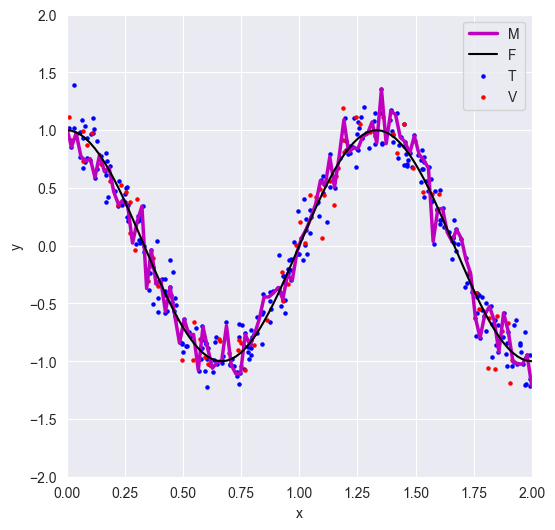

In [423]:
polynomial_features = PolynomialFeatures(degree=7)
lr = LinearRegression()
# model = Pipeline([("polynomial_features", polynomial_features),
#                         ("linear_regression", lr)])

# model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=5)
model = GradientBoostingRegressor(max_depth=3, learning_rate=0.9)

train_model(model, X_train.reshape(-1, 1), y_train)
print("Train MAE = {:.2f}".format(evaluate_model(model, X_train, y_train, calc_mae)))
print("Validation MAE = {:.2f}".format(evaluate_model(model, X_val, y_val, calc_mae)))
visualize(model, X_train, y_train, X_val, y_val)

#Train MAE = 0.02
#Validation MAE = 0.13

Train RMSE = 0.12
Validation RMSE = 0.13


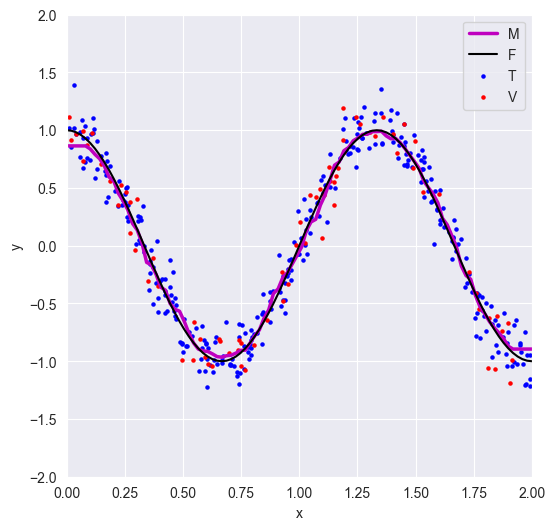

In [424]:
# r1 = RandomForestRegressor(max_depth=7)
# r2 = KNeighborsRegressor(n_neighbors=25)
# r3 = DecisionTreeRegressor(max_depth=7)
# 
# model = VotingRegressor(estimators=[('rf', r1), ('kn', r2), ('dt', r3)])

model = KNeighborsRegressor(n_neighbors=26)

train_model(model, X_train.reshape(-1, 1), y_train)
print("Train RMSE = {:.2f}".format(evaluate_model(model, X_train, y_train, calc_mae)))
print("Validation RMSE = {:.2f}".format(evaluate_model(model, X_val, y_val, calc_mae)))
visualize(model, X_train, y_train, X_val, y_val)

#Train RMSE = 0.06
#Validation RMSE = 0.12

Test MAE = 0.1223075424953932


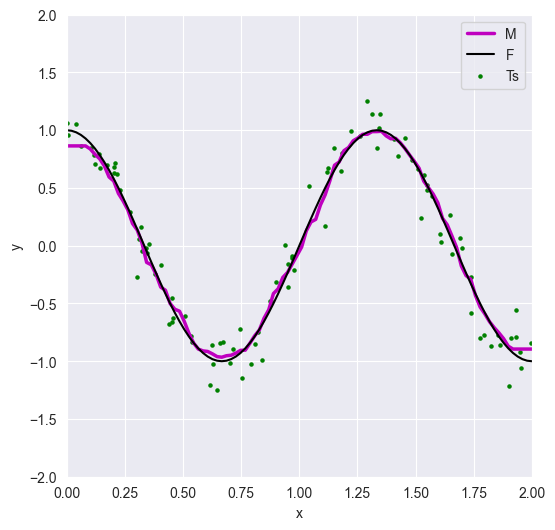

In [425]:
print("Test MAE = {:}".format(evaluate_model(model, X_test, y_test, calc_mae)))

visualize(model, X_test = X_test, y_test = y_test)

#Test MAE = 0.1213